In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [14]:
df = pd.read_csv('data/diabetes.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


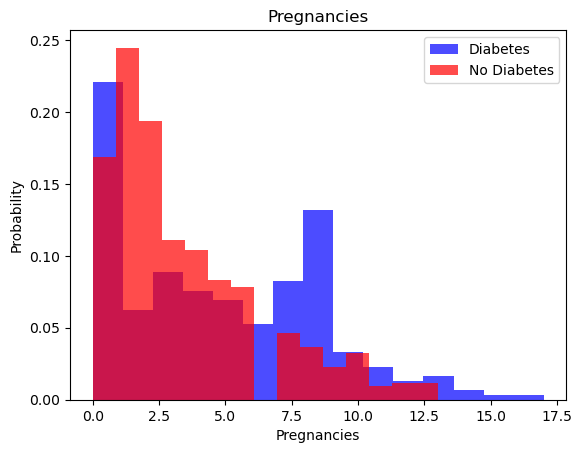

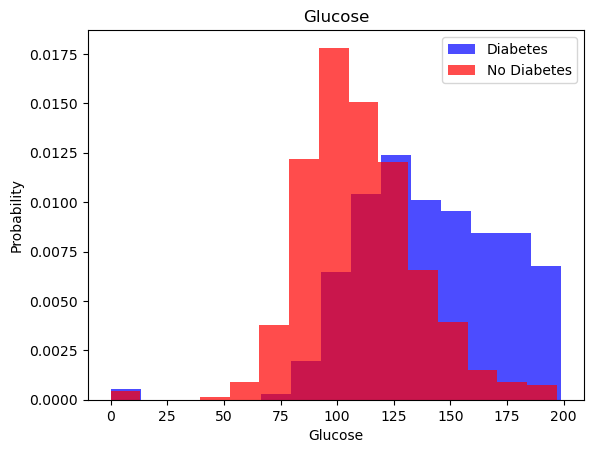

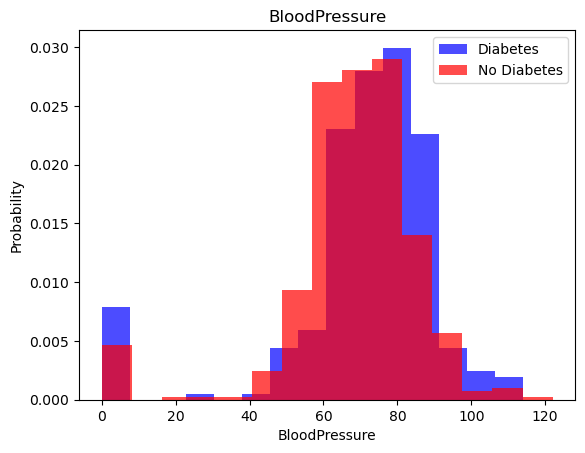

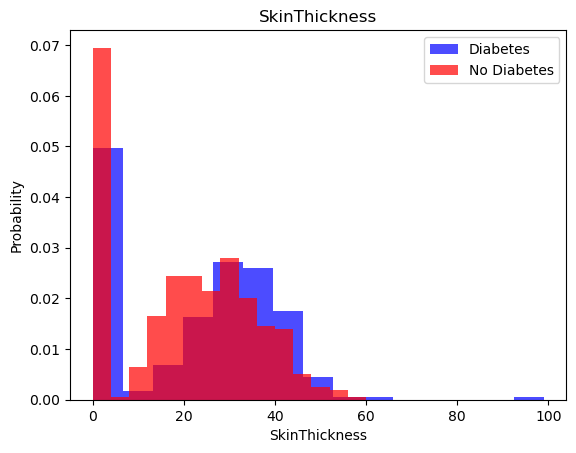

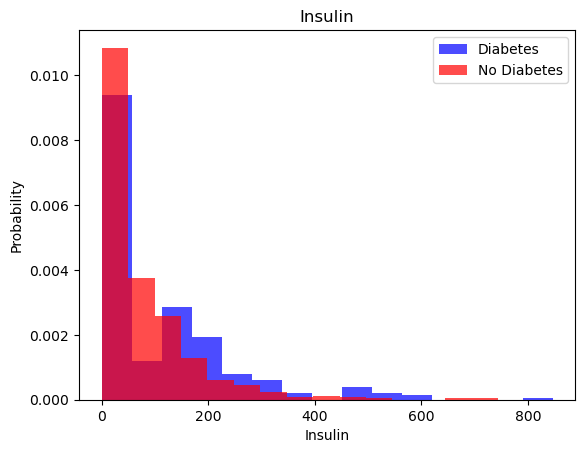

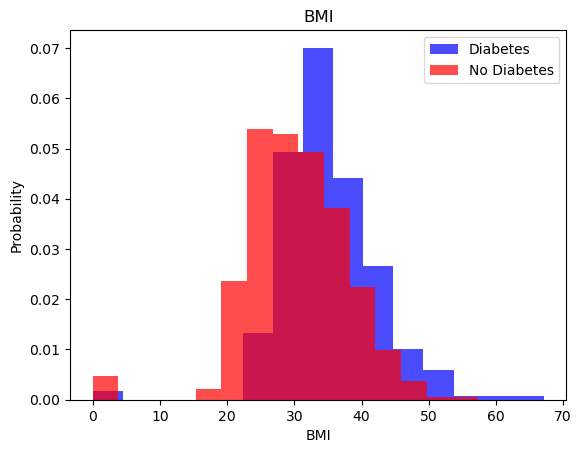

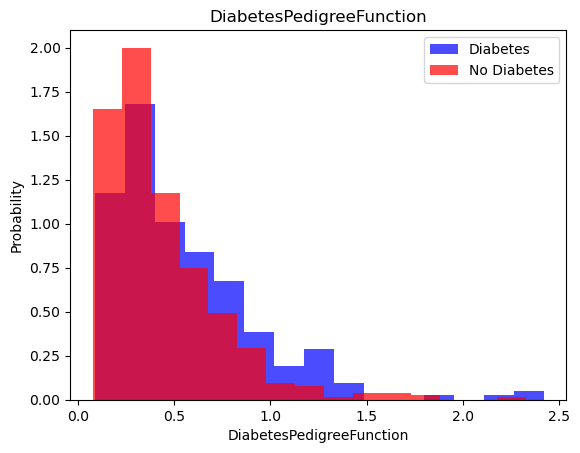

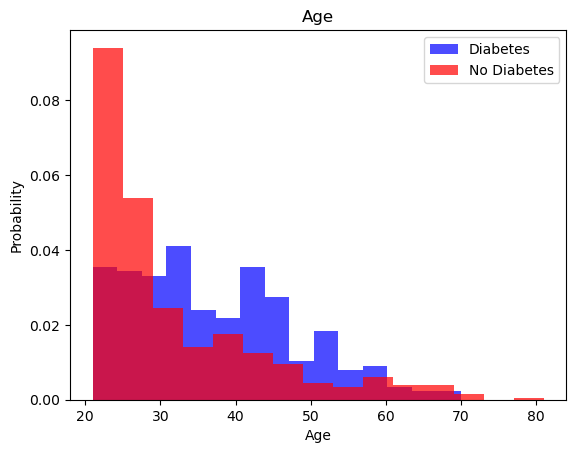

In [16]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue',label='Diabetes', alpha=0.7, density=True,bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red',label='No Diabetes', alpha=0.7, density=True,bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [17]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

In [19]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data,columns = df.columns)

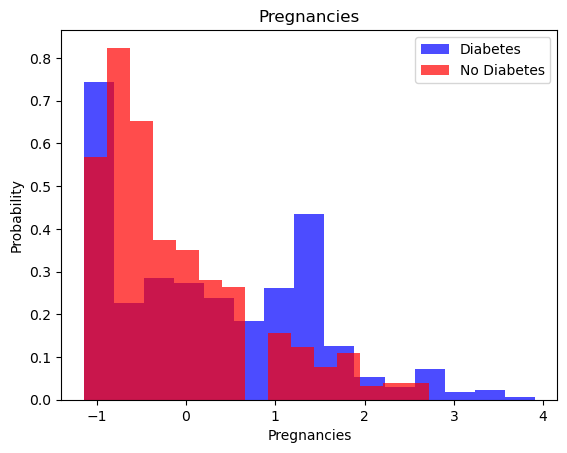

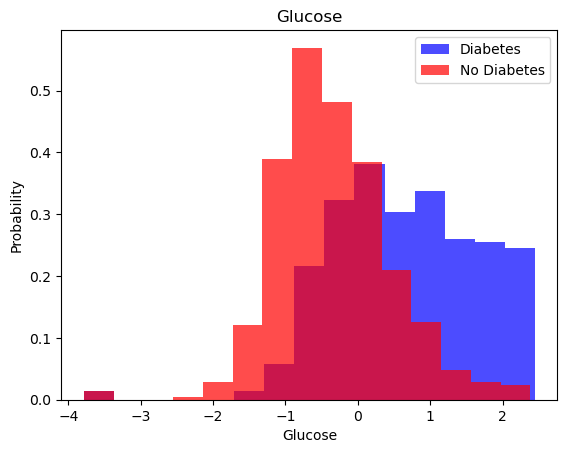

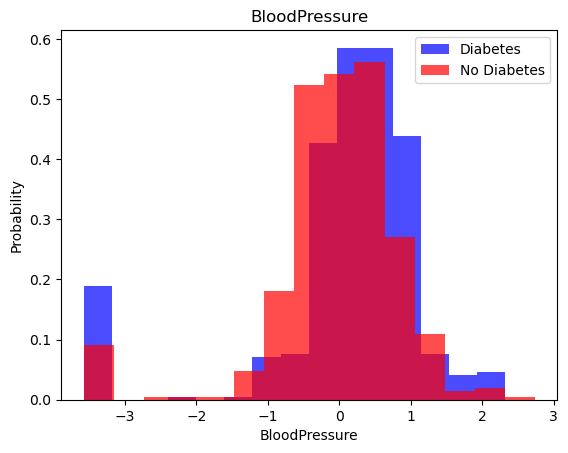

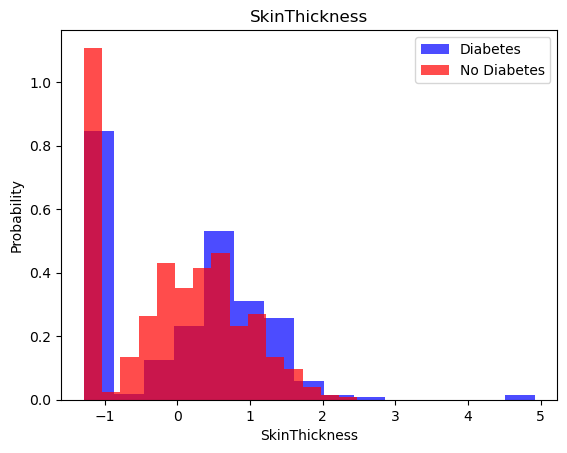

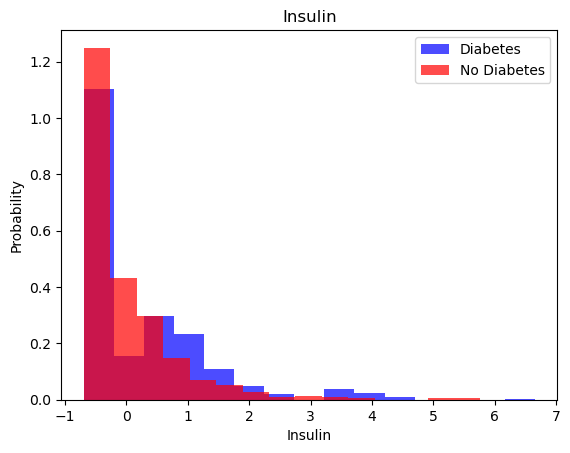

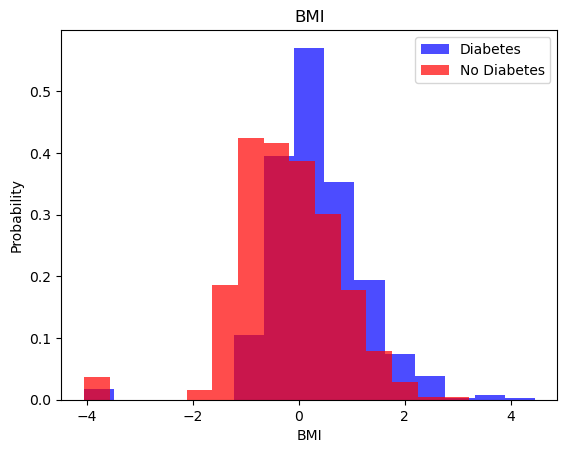

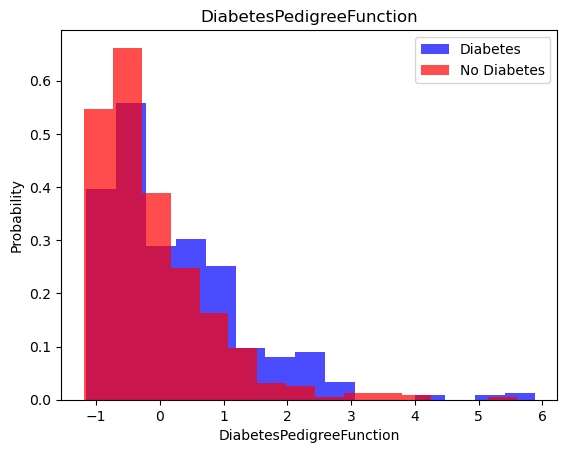

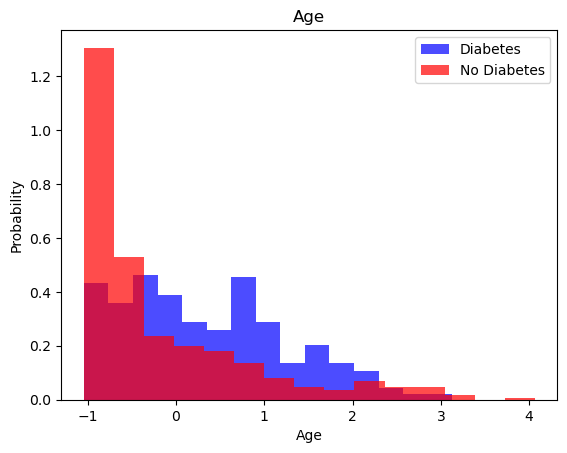

In [20]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue',label='Diabetes', alpha=0.7, density=True,bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red',label='No Diabetes', alpha=0.7, density=True,bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [25]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 4s 3ms/step - loss: 0.7204 - accuracy: 0.5233


[0.7203989624977112, 0.5233333110809326]

In [26]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5700


[0.6938050985336304, 0.5699999928474426]

In [27]:
model.fit(X_train, y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 2s 5ms/step - loss: 0.6656 - accuracy: 0.6250 - val_loss: 0.6158 - val_accuracy: 0.7600
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7383 - val_loss: 0.5814 - val_accuracy: 0.7550
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7333 - val_loss: 0.5529 - val_accuracy: 0.7750
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5452 - accuracy: 0.7283 - val_loss: 0.5260 - val_accuracy: 0.7750
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7250 - val_loss: 0.5089 - val_accuracy: 0.7750
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7333 - val_loss: 0.4946 - val_accuracy: 0.7900
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7417 - val_loss: 0.4841 - val_accuracy: 0.7800
Epoch 8/20
38/38 [==

In [28]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7750


[0.468033105134964, 0.7749999761581421]